In [1]:
import gmsh
import sys 
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [2]:
# plt.imshow(skimage.data.horse(), cmap='gray')
# plt.axis('off')

In [3]:
from fem_poisson import cnt_mesh, msh2xdmf, load_xdmf, solve_poisson, uh_eval

In [4]:
silhouette = skimage.data.horse()
cnt = skimage.measure.find_contours(silhouette, 0.5)[0]
nx, ny = silhouette.shape 
cnt[:,0] = cnt[:,0]/nx 
cnt[:,1] = cnt[:,1]/ny
cnt_mesh(cnt, model_nm='bg')
msh2xdmf()
mesh, ft = load_xdmf()
uh = solve_poisson(mesh, ft) 
Z_bg = uh_eval(uh, mesh, 256, 256)

cnt_mesh(cnt, model_nm='fg')
msh2xdmf()
mesh, ft = load_xdmf()
uh = solve_poisson(mesh, ft) 
Z_fg = uh_eval(uh, mesh, 256, 256)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I

  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "



Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I

In [5]:
x = np.linspace(0,1,256)
y = np.linspace(0,1,256)
X, Y = np.meshgrid(x, y)
Z = Z_fg - Z_bg

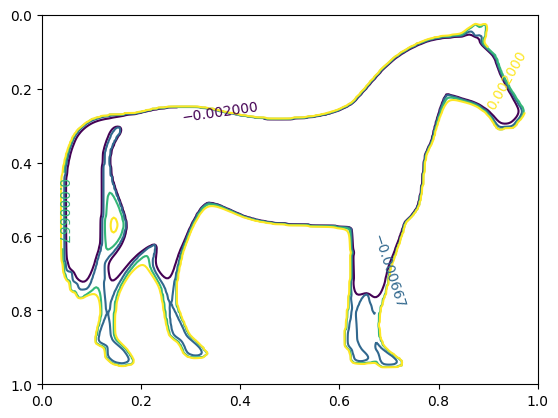

In [10]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.linspace(-0.002,0.002,4))
ax.clabel(CS, inline=True, fontsize=10)
ax.invert_yaxis()

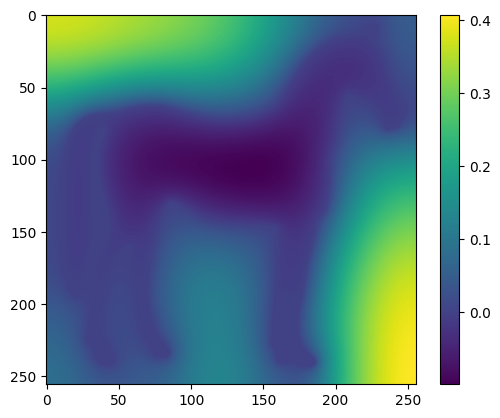

In [8]:
plt.imshow(Z)
plt.colorbar()

In [12]:
x = np.linspace(0,1,128)
y = np.linspace(0,1,128)
Z = np.zeros((128,128))
X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
pts = np.zeros((3,Y.shape[0]))
pts[0] = Y 
pts[1] = X

In [13]:
from dolfinx import geometry
bb_tree = geometry.BoundingBoxTree(mesh, mesh.topology.dim)
cells = []
points_on_proc = []
# Find cells whose bounding-box collide with the the points
cell_candidates = geometry.compute_collisions(bb_tree, pts.T)
# Choose one of the cells that contains the point
colliding_cells = geometry.compute_colliding_cells(mesh, cell_candidates, pts.T)

idx = []
for i, point in enumerate(pts.T):
    if len(colliding_cells.links(i))>0:
        points_on_proc.append(point)
        cells.append(colliding_cells.links(i)[0])
        idx.append(i)

In [14]:
points_on_proc = np.array(points_on_proc, dtype=np.float64)
u_values = uh.eval(points_on_proc, cells)

In [15]:
Z[idx] = u_values.flatten()

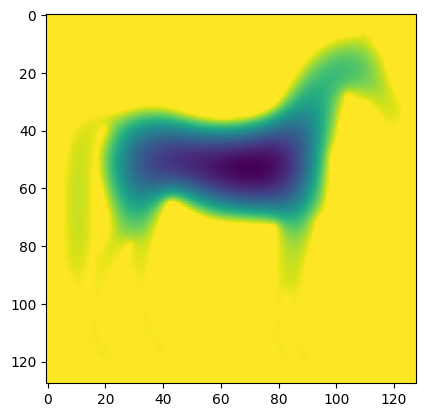

In [16]:
plt.imshow(Z.reshape(128,128))

In [9]:
import ufl
from dolfinx import fem
V_vec = fem.FunctionSpace(mesh, ("CG", 1))
gradu = ufl.project(ufl.grad(uh),V_vec)

AttributeError: module 'ufl' has no attribute 'project'

In [ ]:
ufl.nabla_grad(uh)

In [9]:
Z[idx] = u_values.flatten()

-1.172643710645938e-08

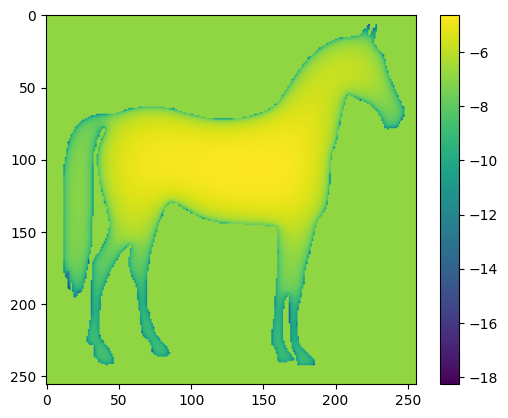

In [12]:
plt.imshow(np.log(-Z).reshape(256, 256))
plt.colorbar()

In [10]:
# import pyvista as pv
# mesh = pv.read('./tmp.msh')
# cpos = mesh.plot(jupyter_backend='pythreejs', show_edges=True)

In [14]:
# import pyvista as pv
# topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
# grid = pv.UnstructuredGrid(topology, cell_types, x)
# num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
# grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
# grid.set_active_scalars("Marker")

# p = pv.Plotter(window_size=[800, 800], shape=(1,2))
# p.subplot(0,0)
# p.add_mesh(grid, show_edges=True)
# p.subplot(0,1)
# grid_uh = pv.UnstructuredGrid(*create_vtk_mesh(V))
# grid_uh.point_data["u"] = uh.x.array.real
# grid_uh.set_active_scalars("u")
# actor1 = p.add_mesh(grid_uh, show_edges=False)
# p.show(jupyter_backend="ipygany")